# Predict if a person has access to bank account or not.

**Exemplary approach**:
- Data cleaning & EDA
- missing value handling 
- categorical reduction
- creating extra features (bining, scaling, etc)
- plotting evaluation scores

**Machine learning**: Supervised segmentation (classification)<br>
**Selected learners**: [random forest, SVC, xgboost, lightGBM, deep learning]<br>
**Evaluation metric**: mean absolute error

In [1]:
# libraries for data manipulation, visualization and data cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data inspection

In [2]:
train= pd.read_csv('data/Train.csv')
test= pd.read_csv('data/Test.csv')

In [3]:
print('Train set shape: ', train.shape)
print('Test set shape: ', test.shape)

Train set shape:  (23524, 13)
Test set shape:  (10086, 12)


In [4]:
from pprint import pprint
def glimpse(data):
    print('[First rows]:\n')
    pprint(data.iloc[:, [1, 2, 3,4,  -1]].head())
    
    print('==============================================================================')
    print('[Last rows]:\n')
    pprint(data.iloc[:, [1, 2, 3, -1]].tail(), indent=4)
    
    print('==============================================================================')
    print('shape: ',data.shape)
    

In [5]:
glimpse(train)

[First rows]:

   year    uniqueid bank_account location_type                   job_type
0  2018  uniqueid_1          Yes         Rural              Self employed
1  2018  uniqueid_2           No         Rural       Government Dependent
2  2018  uniqueid_3          Yes         Urban              Self employed
3  2018  uniqueid_4           No         Rural  Formally employed Private
4  2018  uniqueid_5           No         Urban        Informally employed
[Last rows]:

       year       uniqueid bank_account       job_type
23519  2018  uniqueid_2113           No   Other Income
23520  2018  uniqueid_2114           No   Other Income
23521  2018  uniqueid_2115           No   Other Income
23522  2018  uniqueid_2116           No  Self employed
23523  2018  uniqueid_2117           No      No Income
shape:  (23524, 13)


In [6]:
glimpse(test)

[First rows]:

   year       uniqueid location_type cellphone_access  \
0  2018  uniqueid_6056         Urban              Yes   
1  2018  uniqueid_6060         Urban              Yes   
2  2018  uniqueid_6065         Rural               No   
3  2018  uniqueid_6072         Rural               No   
4  2018  uniqueid_6073         Urban               No   

                       job_type  
0  Formally employed Government  
1     Formally employed Private  
2          Remittance Dependent  
3          Remittance Dependent  
4          Remittance Dependent  
[Last rows]:

       year       uniqueid location_type       job_type
10081  2018  uniqueid_2998         Rural  Self employed
10082  2018  uniqueid_2999         Urban  Self employed
10083  2018  uniqueid_3000         Urban   Other Income
10084  2018  uniqueid_3001         Rural  Self employed
10085  2018  uniqueid_3002         Urban   Other Income
shape:  (10086, 12)


In [7]:
# combine the training & testing set
all_data = pd.concat([train, test])
all_data0 = all_data.copy()

In [8]:
glimpse(all_data)

[First rows]:

   year    uniqueid bank_account location_type                   job_type
0  2018  uniqueid_1          Yes         Rural              Self employed
1  2018  uniqueid_2           No         Rural       Government Dependent
2  2018  uniqueid_3          Yes         Urban              Self employed
3  2018  uniqueid_4           No         Rural  Formally employed Private
4  2018  uniqueid_5           No         Urban        Informally employed
[Last rows]:

       year       uniqueid bank_account       job_type
10081  2018  uniqueid_2998          NaN  Self employed
10082  2018  uniqueid_2999          NaN  Self employed
10083  2018  uniqueid_3000          NaN   Other Income
10084  2018  uniqueid_3001          NaN  Self employed
10085  2018  uniqueid_3002          NaN   Other Income
shape:  (33610, 13)


In [9]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33610 entries, 0 to 10085
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 33610 non-null  object
 1   year                    33610 non-null  int64 
 2   uniqueid                33610 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           33610 non-null  object
 5   cellphone_access        33610 non-null  object
 6   household_size          33610 non-null  int64 
 7   age_of_respondent       33610 non-null  int64 
 8   gender_of_respondent    33610 non-null  object
 9   relationship_with_head  33610 non-null  object
 10  marital_status          33610 non-null  object
 11  education_level         33610 non-null  object
 12  job_type                33610 non-null  object
dtypes: int64(3), object(10)
memory usage: 3.6+ MB


# Exploratory Data Analysis

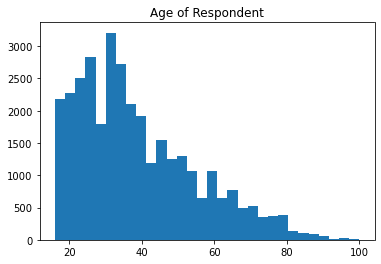

In [10]:
# age of respondent histogram plot
plt.title('Age of Respondent')
plt.hist(all_data['age_of_respondent'], bins=30);

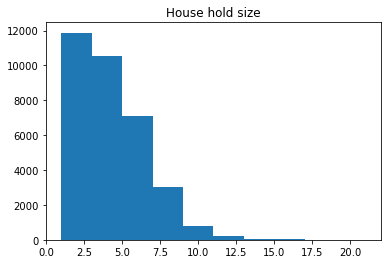

In [11]:
# household size histogram plot
plt.title('House hold size')
plt.hist(all_data['household_size'], bins=10);

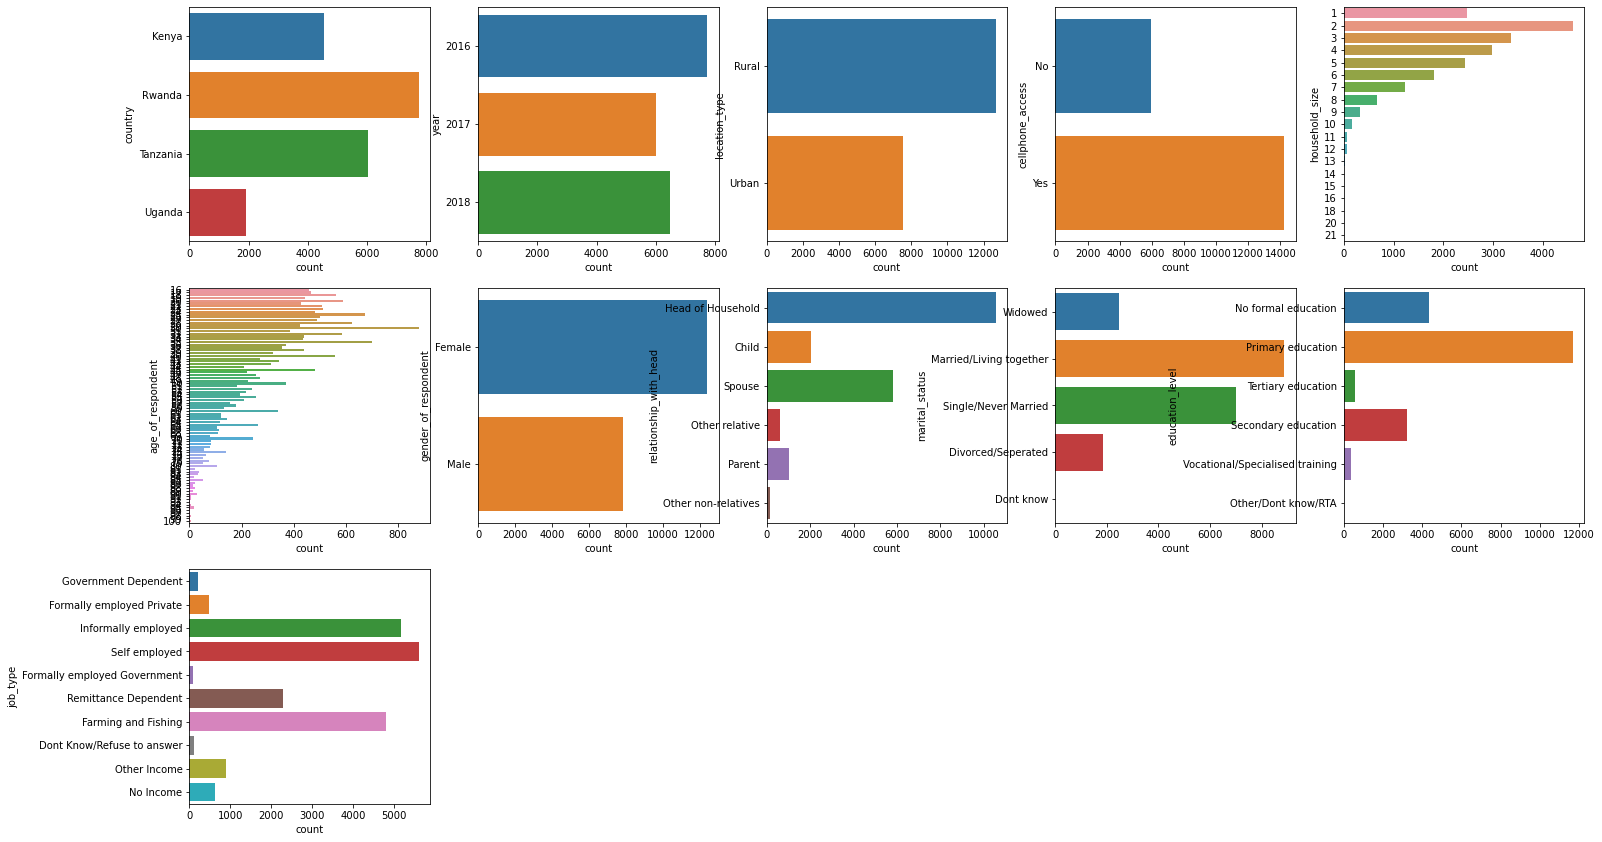

In [12]:
# subseting the data to those who has bank account 
# and those who do not have bank account.
negative = train[train['bank_account'] == 'No']; positive= train[train['bank_account'] == 'Yes']
ll= [    'country',
         'year',
         'location_type',
         'cellphone_access',
         'household_size',
         'age_of_respondent',
         'gender_of_respondent',
         'relationship_with_head',
         'marital_status',
         'education_level',
         'job_type']

plt.figure(figsize=(25, 25))
for index, col in enumerate(ll):
    plt.subplot(5, 5, index+1)
    sns.countplot(y= negative[col])

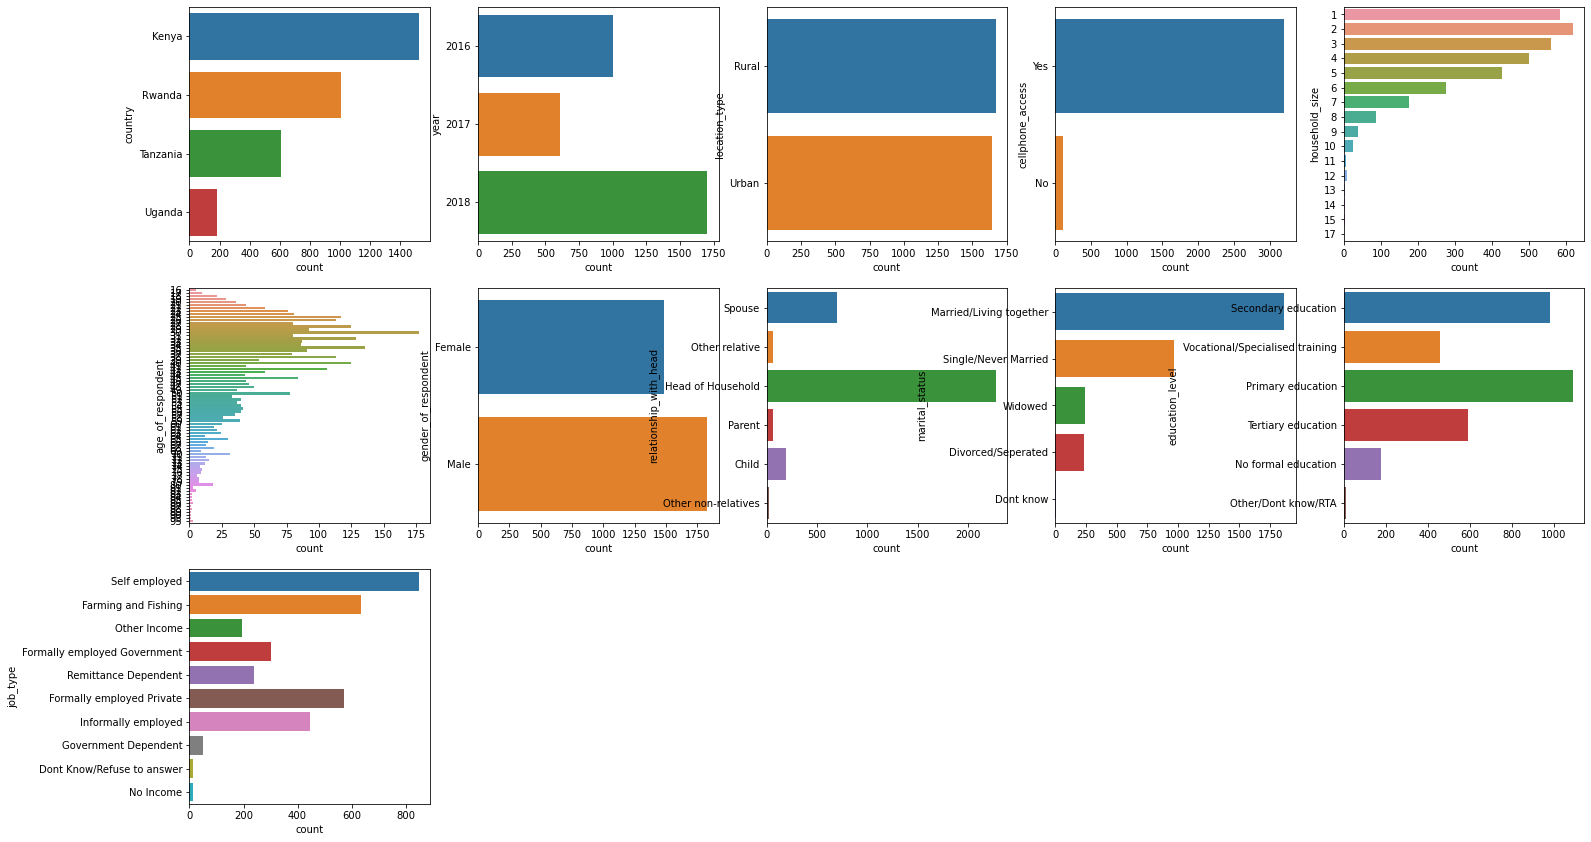

In [13]:
# categorical plot of target target that 
# had bank account.
plt.figure(figsize=(25, 25))
for index, col in enumerate(ll):
    plt.subplot(5, 5, index+1)
    sns.countplot(y= positive[col])

In [14]:
# number of uniques values in every column.
D = {}
for col in all_data.columns:
    D[col] = all_data[col].nunique()
print(pd.Series(D, name='Number of uniques'))

country                       4
year                          3
uniqueid                  12480
bank_account                  2
location_type                 2
cellphone_access              2
household_size               20
age_of_respondent            85
gender_of_respondent          2
relationship_with_head        6
marital_status                5
education_level               6
job_type                     10
Name: Number of uniques, dtype: int64


No     0.859208
Yes    0.140792
Name: bank_account, dtype: float64


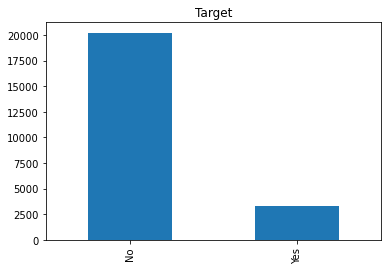

In [15]:
# target distribution for train set
train['bank_account'].value_counts().plot(kind='bar', title='Target')
print(train['bank_account'].value_counts(normalize=True))

In [16]:
all_data.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [17]:
# categorical columns
col0= ['country', 'year',  'location_type',
       'cellphone_access', 'household_size',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type']
len(col0)

10

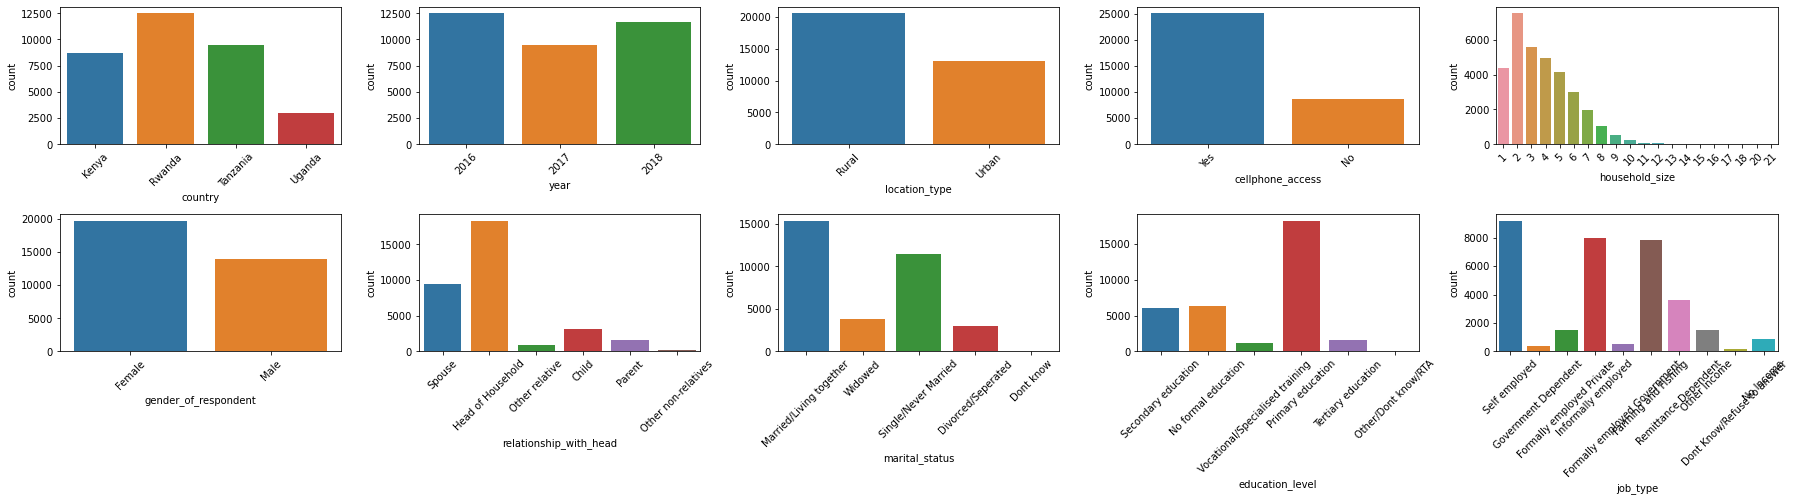

In [18]:
# categorical plot of combine train and test data
plt.figure(figsize=(25, 7))
for index, col in enumerate(col0):
    plt.subplot(2, 5, index+1)
    plt.tight_layout()
    sns.countplot(x = all_data[col])
    plt.xticks(rotation=45)

In [19]:
# frequency distribution of some selected columns

In [20]:
all_data['relationship_with_head'].value_counts(normalize=True)

Head of Household      0.545016
Spouse                 0.278637
Child                  0.094942
Parent                 0.046147
Other relative         0.027551
Other non-relatives    0.007706
Name: relationship_with_head, dtype: float64

In [21]:
all_data['marital_status'].value_counts(normalize=True)

Married/Living together    0.458554
Single/Never Married       0.340077
Widowed                    0.113508
Divorced/Seperated         0.087593
Dont know                  0.000268
Name: marital_status, dtype: float64

In [22]:
all_data['job_type'].value_counts(normalize=True)

Self employed                   0.274026
Informally employed             0.237102
Farming and Fishing             0.232401
Remittance Dependent            0.108123
Other Income                    0.044719
Formally employed Private       0.044600
No Income                       0.026867
Formally employed Government    0.016453
Government Dependent            0.010324
Dont Know/Refuse to answer      0.005385
Name: job_type, dtype: float64

In [23]:
all_data['household_size'].describe([.15, .25, .5, .6, .75, .9, .95, 1])

count    33610.000000
mean         3.791877
std          2.223138
min          1.000000
15%          2.000000
25%          2.000000
50%          3.000000
60%          4.000000
75%          5.000000
90%          7.000000
95%          8.000000
100%        21.000000
max         21.000000
Name: household_size, dtype: float64

# Bining

In [24]:
# create bins for household size
#[1-3, 4-6, 7-9, 10+]
all_data['household_size_bin']= np.where(all_data['household_size'].\
                                     between(5 ,np.inf, inclusive='both'), '6+', all_data['household_size'])

<AxesSubplot:>

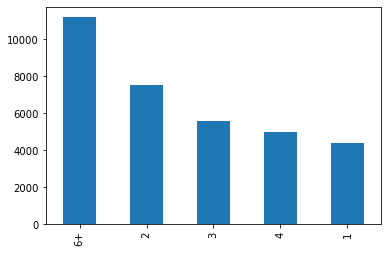

In [25]:
all_data['household_size_bin'].value_counts().plot(kind='bar')

In [26]:
all_data['household_size_bin'].value_counts(normalize=True)

6+    0.333472
2     0.223178
3     0.165367
4     0.147754
1     0.130229
Name: household_size_bin, dtype: float64

In [27]:
all_data['age_of_respondent'].describe([.15, .25, .5, .6, .75, .9, .95, 1])

count    33610.000000
mean        38.656114
std         16.447127
min         16.000000
15%         22.000000
25%         26.000000
50%         35.000000
60%         40.000000
75%         49.000000
90%         63.000000
95%         71.000000
100%       100.000000
max        100.000000
Name: age_of_respondent, dtype: float64

Text(0.5, 1.0, 'Age')

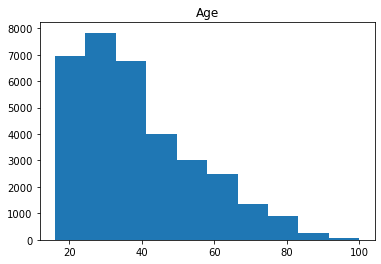

In [28]:
ax = all_data['age_of_respondent'].hist(grid=False)
ax.set_title('Age')

In [29]:
# creating age bins
all_data['age bins']= np.where(all_data['age_of_respondent'].between(15, 20), 'young', '')
all_data['age bins']= np.where(all_data['age_of_respondent'].between(21, 40), 'adults', all_data['age bins'])
all_data['age bins']= np.where(all_data['age_of_respondent'].between(41, 60), 'middle age', all_data['age bins'])
all_data['age bins']= np.where(all_data['age_of_respondent'].between(61, np.inf), 
                               'old age', all_data['age bins'])

<AxesSubplot:title={'center':'age of respondent bins'}>

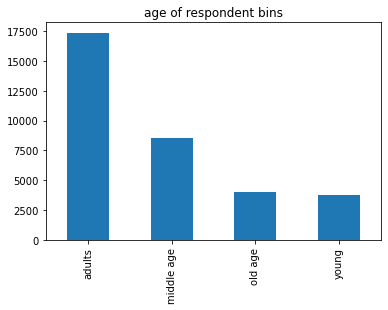

In [30]:
all_data['age bins'].value_counts().plot(kind='bar', title='age of respondent bins')

In [31]:
# relatio with head bins
all_data['relationship with head bin']=\
np.where(all_data['relationship_with_head'].isin(['Head of Household', 'Spouse', 'Child']), 
                                             all_data['relationship_with_head'], 'other')

<AxesSubplot:>

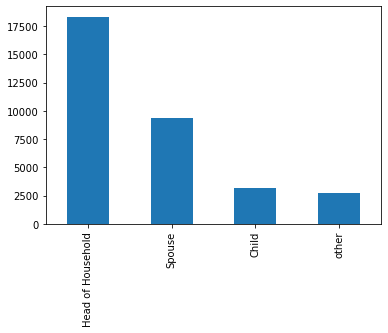

In [32]:
all_data['relationship with head bin'].value_counts().plot(kind='bar')

In [33]:
all_data['marital_status'].unique()

array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know'], dtype=object)

In [34]:
all_data['marital_status'].value_counts()

Married/Living together    15412
Single/Never Married       11430
Widowed                     3815
Divorced/Seperated          2944
Dont know                      9
Name: marital_status, dtype: int64

<AxesSubplot:xlabel='count', ylabel='marital_status'>

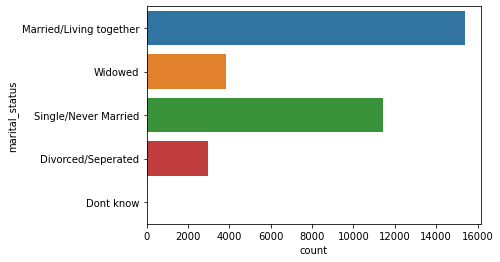

In [35]:
sns.countplot(y = all_data['marital_status'])

In [36]:
# reducing marital status categories
all_data['marital_status'].replace({'Dont know': 'Widowed'}, inplace=True)

<AxesSubplot:title={'center':'marital status'}>

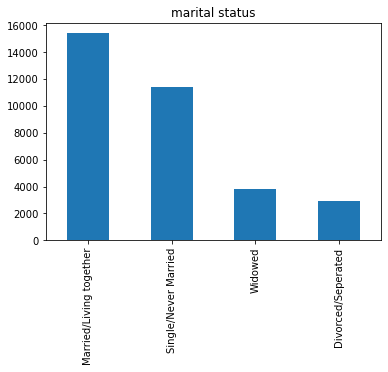

In [37]:
all_data['marital_status'].value_counts().plot(kind='bar', title='marital status')

In [38]:
all_data['education_level'].value_counts(normalize=False)

Primary education                  18270
No formal education                 6351
Secondary education                 6125
Tertiary education                  1649
Vocational/Specialised training     1162
Other/Dont know/RTA                   53
Name: education_level, dtype: int64

<AxesSubplot:>

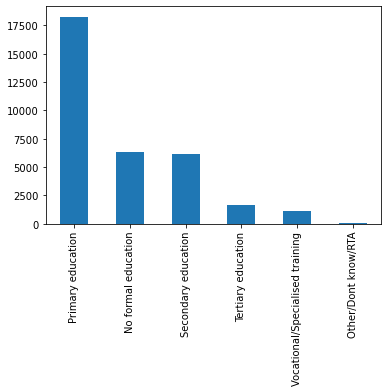

In [39]:
all_data['education_level'].value_counts().plot(kind='bar')

In [40]:
all_data['education_level'].replace({'Other/Dont know/RTA': 'No formal education'}, inplace=True)

<AxesSubplot:>

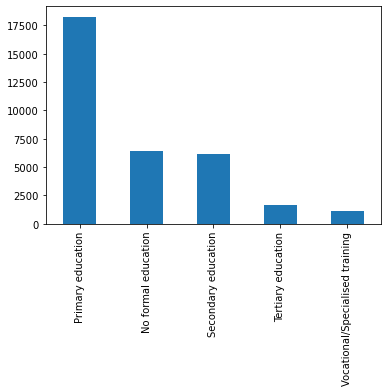

In [41]:
all_data['education_level'].value_counts().plot(kind='bar')

In [42]:
all_data['education_level'].value_counts(normalize=True)

Primary education                  0.543588
No formal education                0.190539
Secondary education                0.182237
Tertiary education                 0.049063
Vocational/Specialised training    0.034573
Name: education_level, dtype: float64

<AxesSubplot:title={'center':'job type'}>

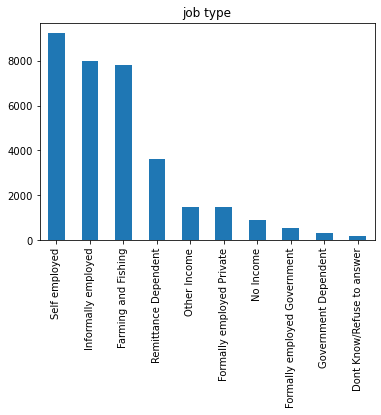

In [43]:
# reducing the categories of job type
all_data['job_type'].value_counts().plot(kind='bar', title='job type')

In [44]:
all_data['job_type'].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

In [45]:
all_data['job_type']= np.where(all_data['job_type'].isin(['Government Dependent', 'Remittance Dependent',
                                                         ]), 'dependent', all_data['job_type'])

all_data['job_type']= np.where(all_data['job_type'].\
                               isin(['Formally employed Private', 
                                     'Formally employed Government', 
                                     'Self employed']), 'formally employed', 
                               all_data['job_type'])

all_data['job_type']= np.where(all_data['job_type'].isin(['Farming and Fishing','Other Income',
                                                           'Dont Know/Refuse to answer'
                                                         ]), 'other', all_data['job_type'])

all_data['job_type']= np.where(all_data['job_type'].isin(['No Income']), 'no income', all_data['job_type'])

<AxesSubplot:title={'center':'Job type-reduced'}>

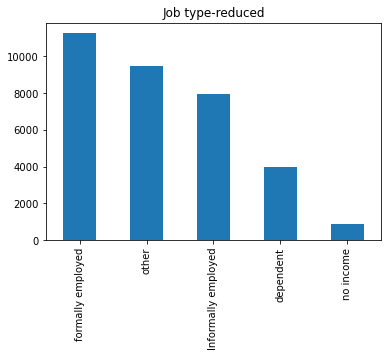

In [46]:
all_data['job_type'].value_counts().plot(kind='bar', title='Job type-reduced')

In [47]:
# reducing the age columns
all_data['age_of_respondent']=\
np.where(all_data['age_of_respondent'].between(50, np.inf), '50+', all_data['age_of_respondent'])

In [50]:
all_data['household_size']= \
np.where(all_data['household_size'].between(5, np.inf), '5+', all_data['household_size'])

<AxesSubplot:>

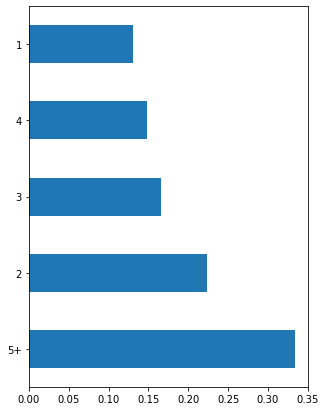

In [51]:
all_data['household_size'].value_counts(normalize=True).plot(kind='barh', figsize=(5, 7))

In [67]:
col1= ['country', 'year', 'location_type',
'cellphone_access', 'household_size', 'age_of_respondent',
'gender_of_respondent', 'relationship_with_head', 'marital_status',
'education_level', 'job_type', 'household_size_bin', 'age bins',
'relationship_with_head']

len(col1)

14

In [54]:
all_data[col1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33610 entries, 0 to 10085
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 33610 non-null  object
 1   year                    33610 non-null  int64 
 2   location_type           33610 non-null  object
 3   cellphone_access        33610 non-null  object
 4   household_size          33610 non-null  object
 5   age_of_respondent       33610 non-null  object
 6   gender_of_respondent    33610 non-null  object
 7   relationship_with_head  33610 non-null  object
 8   marital_status          33610 non-null  object
 9   education_level         33610 non-null  object
 10  job_type                33610 non-null  object
 11  household_size_bin      33610 non-null  object
 12  age bins                33610 non-null  object
 13  relationship_with_head  33610 non-null  object
dtypes: int64(1), object(13)
memory usage: 4.9+ MB


<AxesSubplot:xlabel='count', ylabel='cellphone_access'>

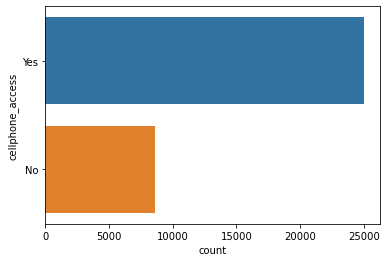

In [55]:
sns.countplot(y=all_data[col1[3]])

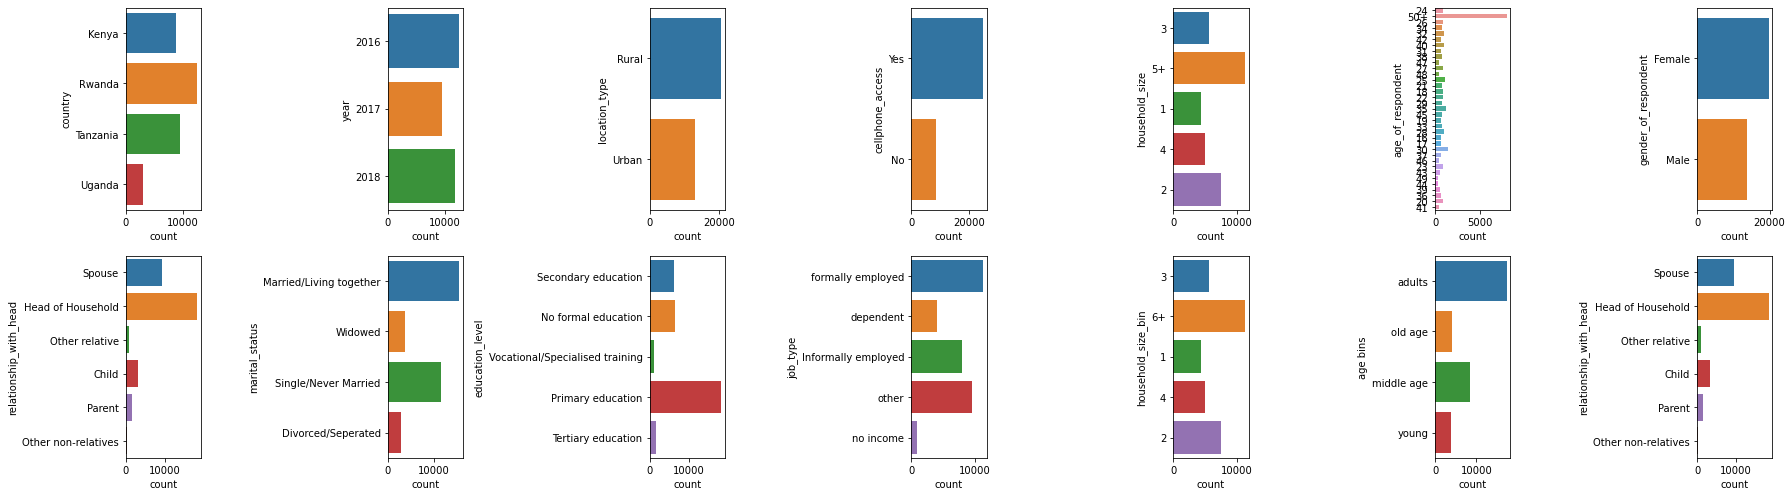

In [56]:
# visualizing current data
# after cleaning
plt.figure(figsize=(25, 7))
for index, col in enumerate(col1):
    plt.subplot(2, 7, index+1)
    plt.tight_layout()
    sns.countplot(y=all_data[col])

In [58]:
all_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,household_size_bin,age bins,relationship with head bin
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,formally employed,3,adults,Spouse
1,Kenya,2018,uniqueid_2,No,Rural,No,5+,50+,Female,Head of Household,Widowed,No formal education,dependent,6+,old age,Head of Household
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5+,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,formally employed,6+,adults,other
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5+,34,Female,Head of Household,Married/Living together,Primary education,formally employed,6+,adults,Head of Household
4,Kenya,2018,uniqueid_5,No,Urban,No,5+,26,Male,Child,Single/Never Married,Primary education,Informally employed,6+,adults,Child


In [59]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33610 entries, 0 to 10085
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   country                     33610 non-null  object
 1   year                        33610 non-null  int64 
 2   uniqueid                    33610 non-null  object
 3   bank_account                23524 non-null  object
 4   location_type               33610 non-null  object
 5   cellphone_access            33610 non-null  object
 6   household_size              33610 non-null  object
 7   age_of_respondent           33610 non-null  object
 8   gender_of_respondent        33610 non-null  object
 9   relationship_with_head      33610 non-null  object
 10  marital_status              33610 non-null  object
 11  education_level             33610 non-null  object
 12  job_type                    33610 non-null  object
 13  household_size_bin          33610 non-null  ob

In [60]:
all_data.shape

(33610, 16)

In [61]:
# drop columns that are not needed
all_data.drop(['uniqueid', ], axis=1, inplace=True)

In [62]:
# encode the target column
all_data['bank_account'].replace({'Yes':1, 'No': 0}, inplace=True)

In [63]:
all_data.isna().sum()

country                           0
year                              0
bank_account                  10086
location_type                     0
cellphone_access                  0
household_size                    0
age_of_respondent                 0
gender_of_respondent              0
relationship_with_head            0
marital_status                    0
education_level                   0
job_type                          0
household_size_bin                0
age bins                          0
relationship with head bin        0
dtype: int64

# data spliting and model fiting

In [64]:
X= all_data[['country',
             'year',
             'location_type',
             'cellphone_access',
             'household_size',
             'age_of_respondent',
             'gender_of_respondent',
             'relationship_with_head',
             'marital_status',
             'education_level',
             'job_type',
             'household_size_bin',
             'age bins',
             'relationship with head bin',
             ]]

y = all_data['bank_account']

In [69]:
# libraries for model building & evaluation

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import auc, classification_report, f1_score, mean_absolute_error

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# initialize the samplers, encoders and scalers
over= RandomOverSampler()
under = RandomUnderSampler()
smote= SMOTE()

ohe= OneHotEncoder()

In [73]:
from sklearn.model_selection import train_test_split
X_train, y_train = X.iloc[:23524, :], y.iloc[:23524] # train, validate and evaluate
X_test= X.iloc[23525:, :]# make model prediction.

# 
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                      y_train, 
                                                      stratify=y_train, 
                                                      test_size=.019, 
                                                      random_state=45)
print('train size: ', X_train.shape)
print('validation size: ', X_val.shape)
print('test size: ', X_test.shape)

train size:  (23077, 14)
validation size:  (447, 14)
test size:  (10085, 14)


In [74]:
cat_columns = list(X_train)

col_transformer = ColumnTransformer([('ohe', ohe, cat_columns),], remainder='passthrough')
model = Pipeline([('transformer', col_transformer), ('smote', smote), ('clf', RandomForestClassifier()) ])

In [75]:
model.fit(X_train, y_train);

In [76]:
preds= model.predict(X_val)

In [77]:
print(classification_report(y_val, preds))
print('mean absolute error::', mean_absolute_error(y_val, preds))

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       384
         1.0       0.51      0.43      0.47        63

    accuracy                           0.86       447
   macro avg       0.71      0.68      0.69       447
weighted avg       0.85      0.86      0.86       447

mean absolute error:: 0.13870246085011187


In [80]:

# learners
light=LGBMClassifier()
tree= DecisionTreeClassifier()
logit= LogisticRegression(max_iter=1001)
forest= RandomForestClassifier()

clfs = [forest, tree, logit, light]
names= ['randomforest', 'decisiontree', 'logistic_regression', 'lgm']

MAE_SCORES=[]
for clf, name in zip(clfs, names):
    col_transformer = ColumnTransformer([('ohe', ohe, cat_columns), ], 
                                        remainder='passthrough')
    pipe = Pipeline([('transformer', col_transformer), ('smote', smote), ('clf='+name, clf) ])
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_val)
    scores = mean_absolute_error(y_val, pred)
    MAE_SCORES.append(scores)

    
logs= pd.Series(MAE_SCORES, index=names)  

In [81]:
logs

randomforest           0.154362
decisiontree           0.152125
logistic_regression    0.217002
lgm                    0.118568
dtype: float64

In [86]:
LGBMClassifier?

In [92]:
# tuning LightGBM using bayesian method

import optuna
from optuna.samplers import TPESampler


def obj_fun(trial):
    
    num_leaves= trial.suggest_int('num_leaves', 30, 50)
    learning_rate= trial.suggest_uniform('learning_rate', 0.01, 0.1)
    
    clf = LGBMClassifier(
                    boosting_type = 'gbdt',
                    num_leaves=num_leaves,
                    learning_rate=learning_rate,
                    n_estimators= 200
                    
                )



    cat_columns = list(X_train)
    ohe = OneHotEncoder()
    sc = StandardScaler()

    col_trans = ColumnTransformer([('encoder', ohe, cat_columns),])

    pipe= Pipeline(steps=[('column_transformer', col_trans),  ('over', over), 
                          ('smote', smote),('clf', clf)])
    
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_val)
    score= mean_absolute_error(y_val, pred)
    
    return score


study= optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(obj_fun, n_trials=200)
best_trail = study.best_trial.value

[I 2021-10-26 18:45:24,166] A new study created in memory with name: no-name-f836390a-a496-407f-a6d7-a5ebb29a65a5
[I 2021-10-26 18:45:25,009] Trial 0 finished with value: 0.21700223713646533 and parameters: {'num_leaves': 50, 'learning_rate': 0.011078730612373269}. Best is trial 0 with value: 0.21700223713646533.
[I 2021-10-26 18:45:25,713] Trial 1 finished with value: 0.18344519015659955 and parameters: {'num_leaves': 46, 'learning_rate': 0.09369197086468099}. Best is trial 1 with value: 0.18344519015659955.
[I 2021-10-26 18:45:26,649] Trial 2 finished with value: 0.2080536912751678 and parameters: {'num_leaves': 41, 'learning_rate': 0.09608730766127953}. Best is trial 1 with value: 0.18344519015659955.
[I 2021-10-26 18:45:27,241] Trial 3 finished with value: 0.2058165548098434 and parameters: {'num_leaves': 40, 'learning_rate': 0.07961004207812679}. Best is trial 1 with value: 0.18344519015659955.
[I 2021-10-26 18:45:27,886] Trial 4 finished with value: 0.19015659955257272 and parame

[I 2021-10-26 18:45:50,524] Trial 38 finished with value: 0.2058165548098434 and parameters: {'num_leaves': 44, 'learning_rate': 0.09929689433033669}. Best is trial 37 with value: 0.174496644295302.
[I 2021-10-26 18:45:51,155] Trial 39 finished with value: 0.19910514541387025 and parameters: {'num_leaves': 49, 'learning_rate': 0.09514030545115604}. Best is trial 37 with value: 0.174496644295302.
[I 2021-10-26 18:45:51,782] Trial 40 finished with value: 0.18120805369127516 and parameters: {'num_leaves': 43, 'learning_rate': 0.08850260083669238}. Best is trial 37 with value: 0.174496644295302.
[I 2021-10-26 18:45:52,458] Trial 41 finished with value: 0.20134228187919462 and parameters: {'num_leaves': 43, 'learning_rate': 0.08883947756748044}. Best is trial 37 with value: 0.174496644295302.
[I 2021-10-26 18:45:53,244] Trial 42 finished with value: 0.18344519015659955 and parameters: {'num_leaves': 46, 'learning_rate': 0.08171592308640926}. Best is trial 37 with value: 0.174496644295302.
[

KeyboardInterrupt: 

In [85]:
best_trail

0.18120805369127516

In [ ]:
X_train.shape

In [ ]:
# tuning RandomForest using bayesian method

import optuna
from optuna.samplers import TPESampler


def obj_fun(trial):
    
    max_depth= trial.suggest_int('max_depth', 2, 50)
    max_leaf_nodes= trial.suggest_int('max_leaf_nodes', 2, 10)
    max_features= trial.suggest_int('max_features', 2, 10)
    
    clf2 = RandomForestClassifier(
                                    n_estimators=300,
                                    max_depth=max_depth,
                                    max_features=max_features,
                                    max_leaf_nodes=max_leaf_nodes
                                )



    cat_columns = list(X_train)
    ohe = OneHotEncoder()
    sc = StandardScaler()

    col_trans = ColumnTransformer([('encoder', ohe, cat_columns),])

    pipe= Pipeline(steps=[('column_transformer', col_trans),  ('over', over), 
                          ('smote', smote),('clf', clf2)])
    
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_val)
    score= mean_absolute_error(y_val, pred)
    
    return score


study= optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(obj_fun, n_trials=100)
best_trail = study.best_trial.value

In [ ]:
best_trail

In [97]:
col_transformer = ColumnTransformer([('ohe', ohe, cat_columns), ], 
                                        remainder='passthrough')
pipe = Pipeline([('transformer', col_transformer), ('smote', smote), ('clf=', LGBMClassifier()) ])
pipe.fit(X_train, y_train)
pred = pipe.predict(X_val)
print('mean absolute error (lightgbm): ', mean_absolute_error(y_val, pred))

mean absolute error (lightgbm):  0.12080536912751678


In [99]:
from joblib import dump
dump(pipe, 'output/model.pkl')

['output/model.pkl']